___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [4]:
df=pd.read_csv('store_sharing.csv' )

In [5]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [6]:
df.shape

(17414, 10)

In [7]:
df.isna().all().values

array([False, False, False, False, False, False, False, False, False,
       False])

In [8]:
df.duplicated().value_counts()

False    17414
dtype: int64

### 3.Check missing values and if there are any dublicate rows or not.

In [9]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

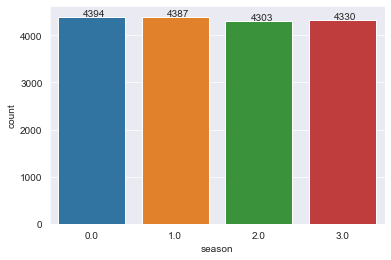

In [15]:
# season
fig,ax =plt.subplots()
sns.countplot(x='season',data=df)
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.3, p.get_height()+20));

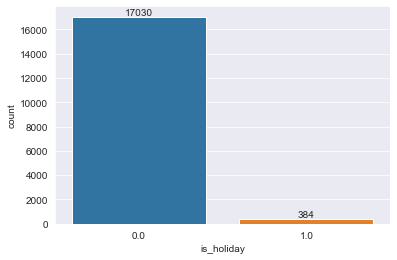

In [16]:
# is_holiday
fig,ax = plt.subplots()
chart=sns.countplot(x='is_holiday',data=df)
chart.bar_label(chart.containers[0],fmt='%d');

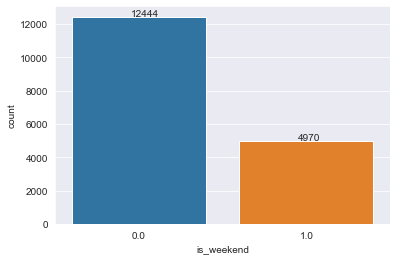

In [18]:
# is_weekend
fig,ax=plt.subplots()
sns.countplot(x='is_weekend' , data=df)
for p in ax.patches:
   ax.annotate((p.get_height()), (p.get_x()+0.35, p.get_height()+30));

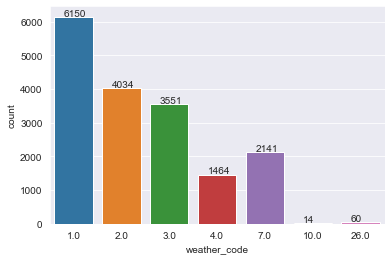

In [19]:
# weather_code
fig,ax=plt.subplots()
sns.countplot(x='weather_code' , data=df)
for p in ax.patches:
   ax.annotate((p.get_height()), (p.get_x()+0.20, p.get_height()+30));

### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [20]:
type(df['timestamp'][0])

str

In [21]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df['timestamp']

0       2015-01-04 00:00:00
1       2015-01-04 01:00:00
2       2015-01-04 02:00:00
3       2015-01-04 03:00:00
4       2015-01-04 04:00:00
                ...        
17409   2017-01-03 19:00:00
17410   2017-01-03 20:00:00
17411   2017-01-03 21:00:00
17412   2017-01-03 22:00:00
17413   2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: datetime64[ns]

In [22]:
df.set_index('timestamp',inplace=True)

In [23]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

In [24]:
df.index

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

In [25]:
df.index.year

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='timestamp', length=17414)

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

In [26]:
f = lambda x: x.strftime('%Y-%m') # strftime works with array

df['year_month'] = f(df.index)
df['year'] = df.index.year  # only apply to array
df['month'] = df.index.month
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['hour'] = df.index.hour

In [ ]:
#alternatif


In [27]:
#df['year_month'] = df.timestamp.map(lambda x: x.strftime('%Y-%m')) #istendigi gibi kolon olusturduk
#df['year_month'] = pd.to_datetime(df['year_month']) #bunun da data tipini degistik
#df['year'] = df['timestamp'].dt.year #aslinda yukardakini oyle istedikleri
#o sekilde yaptim, eger bunun gibi dt.xxx 
#seklinde yaparsak direkt data tipi int olarak geliyo onun icin geri kalanini da:
#df['month'] = df['timestamp'].dt.month
#df['day_of_month'] = df['timestamp'].dt.day
#df['day_of_week'] = df['timestamp'].dt.weekday
#df['hour'] = df['timestamp'].dt.hour

In [28]:
df.head(1)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0


### 7.Visualize the correlation with a heatmap

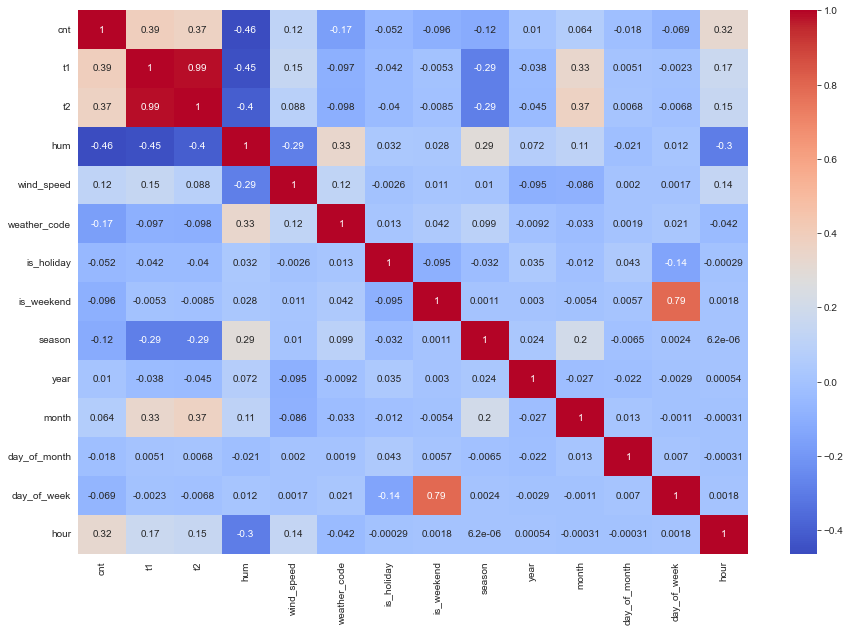

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(),annot= True ,cmap='coolwarm');
## # BONUS If you want to show half of the Meatmap Matrix
# # Getting the Upper Triangle of the co-relation matrix
# matrix = np.triu(df.corr())

# # using the upper triangle matrix as mask 
# sns.heatmap(df.corr(), annot=True, cmap="coolwarm", mask=matrix);
           

In [30]:
df_corr_cnt=df.corr()[['cnt']].sort_values(by='cnt',ascending=False)
df_corr_cnt

,cnt
cnt,1.000000
t1,0.388798
t2,0.369035
hour,0.324423
wind_speed,0.116295
month,0.063757
year,0.010046
day_of_month,-0.017887
is_holiday,-0.051698
day_of_week,-0.068688


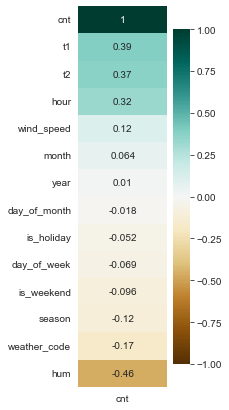

In [31]:
plt.figure(figsize=(2,7))
sns.heatmap(df_corr_cnt,annot=True,cmap='BrBG',vmin=-1,vmax=1);

In [ ]:
#The possible value of the palette/cmap are:

#‘Accent’, ‘Accent_r’, ‘Blues’, ‘Blues_r’, ‘BrBG’, ‘BrBG_r’, ‘BuGn’, #
#‘BuGn_r’, ‘BuPu’, ‘BuPu_r’, ‘CMRmap’, ‘CMRmap_r’, ‘Dark2’, ‘Dark2_r’, 
#‘GnBu’, ‘GnBu_r’, ‘Greens’, ‘Greens_r’, ‘Greys’, ‘Greys_r’, ‘OrRd’, 
#‘Pastel2_r’, ‘PiYG’, ‘PiYG_r’, 
#‘PuBu’, ‘PuBuGn’, ‘PuBuGn_r’, ‘PuBu_r’, ‘PuOr’, ‘PuOr_r’, ‘PuRd’, 
#‘PuRd_r’, ‘Purples’, ‘Purples_r’, ‘RdBu’, ‘RdBu_r’, ‘RdGy’, ‘RdGy_r’, 
#‘RdPu’, ‘RdPu_r’, ‘RdYlBu’, ‘RdYlBu_r’, ‘RdYlGn’, ‘RdYlGn_r’, ‘Reds’, 
#‘#Reds_r’, ‘Set1’, ‘Set1_r’, ‘Set2’, ‘Set2_r’, ‘Set3’, ‘Set3_r’, 
#‘Spectral’, ‘Spectral_r’, ‘Wistia’, ‘Wistia_r’, ‘YlGn’, ‘YlGnBu’, 
#YlGnBu_r’, ‘YlGn_r’, ‘YlOrBr’, ‘YlOrBr_r’, ‘YlOrRd’, ‘YlOrRd_r’, ‘afmhot’,
#‘afmhot_r’, ‘autumn’, ‘autumn_r’, ‘binary’, ‘binary_r’, ‘bone’, ‘bone_r’, 
#‘brg’, ‘brg_r’, ‘bwr’, ‘bwr_r’, ‘cividis’, ‘cividis_r’, ‘cool’, ‘cool_r’,
#‘coolwarm’, ‘coolwarm_r’, ‘copper’, ‘copper_r’, ‘cubehelix’, 
#‘cubehelix_r’, ‘flag’, ‘flag_r’, ‘gist_earth’, ‘gist_earth_r’, 
#‘gist_gray’, ‘gist_gray_r’, ‘gist_heat’, ‘gist_heat_r’, 
#‘gist_ncar’, ‘gist_ncar_r’, ‘gist_rainbow’, ‘gist_rainbow_r’, 
#‘gist_stern’, ‘gist_stern_r’, ‘gist_yarg’, ‘gist_yarg_r’, 
#‘gnuplot’, ‘gnuplot2’, ‘gnuplot2_r’, ‘gnuplot_r’, ‘gray’, 
#‘gray_r’, ‘hot’, ‘hot_r’, ‘hsv’, ‘hsv_r’, ‘icefire’, 
#‘icefire_r’, ‘inferno’, ‘inferno_r’, ‘jet’, ‘jet_r’, 
#‘magma’, ‘magma_r’, ‘mako’, ‘mako_r’, ‘nipy_spectral’, 
#‘nipy_spectral_r’, ‘ocean’, ‘ocean_r’, ‘pink’, ‘pink_r’,
#‘plasma’, ‘plasma_r’, ‘prism’, ‘prism_r’, ‘rainbow’, ‘rainbow_r’, 
#‘rocket’, ‘rocket_r’, ‘seismic’, ‘seismic_r’, ‘spring’, ‘spring_r’,
#‘summer’, ‘summer_r’, ‘tab10’, ‘tab10_r’,’tab20′, ‘tab20_r’, ‘tab20b’, 
#‘tab20b_r’, ‘tab20c’, ‘tab20c_r’, ‘terrain’, ‘terrain_r’, ‘turbo’, 
#‘turbo_r’, ‘twilight’, ‘twilight_r’, ‘twilight_shifted’, 
#‘twilight_shifted_r’, ‘viridis’, ‘viridis_r’, ‘vlag’, ‘vlag_r’, 
#‘winter’, ‘winter_r’

### 8. Visualize the correlation of the target variable and the other features with barplot

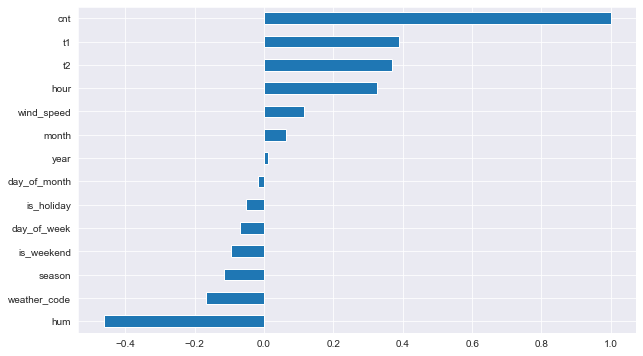

In [32]:
#with pandas
plt.figure(figsize=(10,6))
df.corr()['cnt'].sort_values().plot.barh();


In [ ]:
#Alternative Sol

#x = df.corr()["cnt"].sort_values(ascending=False).index
#y = df.corr()["cnt"].sort_values(ascending=False).values
#sns.barplot(y,x, orient="h", color="b" )

### 9.Plot bike shares over time use lineplot

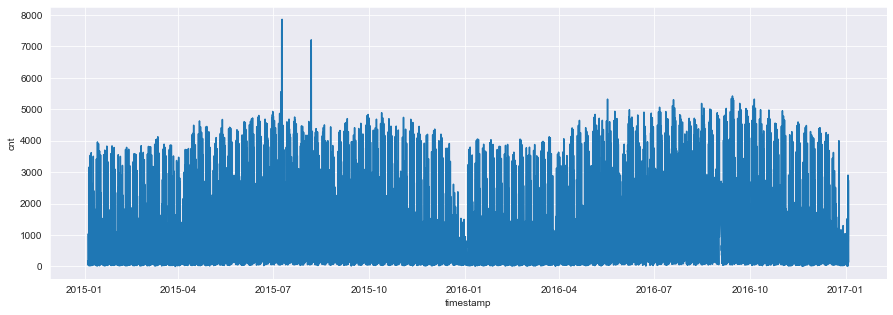

In [33]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x=df.index,y='cnt');

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [34]:
df_sum=df.groupby('year_month').cnt.sum()
df_sum


year_month
2015-01     546639
2015-02     543594
2015-03     695934
2015-04     831582
2015-05     895413
2015-06    1033252
2015-07    1120687
2015-08    1033951
2015-09     892478
2015-10     865046
2015-11     677332
2015-12     602838
2016-01     582518
2016-02     592910
2016-03     656527
2016-04     768845
2016-05    1001935
2016-06     933878
2016-07    1165527
2016-08    1137314
2016-09     998619
2016-10     935706
2016-11     703859
2016-12     651908
2017-01      37680
Name: cnt, dtype: int64

In [ ]:
df_sum.index
df_sum.values

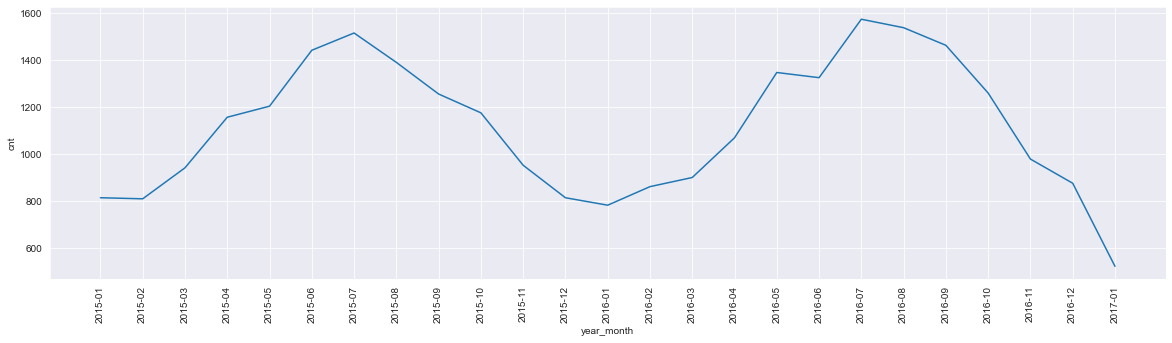

In [36]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df ,x='year_month',y='cnt',ci=None)
plt.ticklabel_format(style="plain" ,axis='y')
plt.xticks(rotation=90);
# pd.DataFrame(df.groupby('year_month').cnt.mean().apply(lambda x:round(x, 1))).reset_index(drop=Tr

In [37]:
df.groupby("month")["cnt"].mean()

month
1      784.691997
2      836.279617
3      921.294959
4     1112.953408
5     1275.099462
6     1383.354430
7     1543.696151
8     1463.116577
9     1356.597561
10    1217.546991
11     965.867832
12     845.516173
Name: cnt, dtype: float64

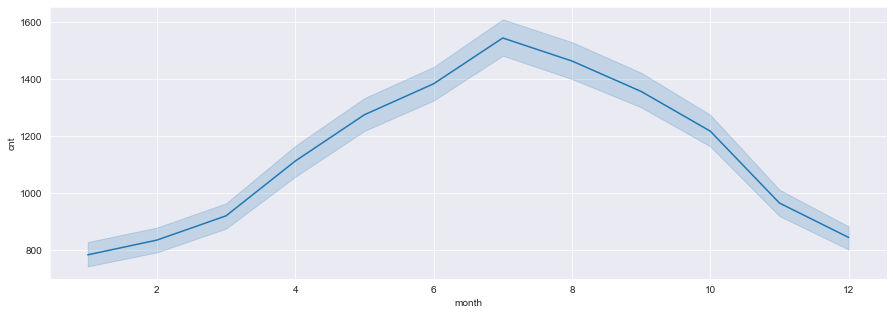

In [38]:
# with lineplot
plt.figure(figsize=(15, 5))
sns.lineplot(x='month', y='cnt', data=df);
# pd.DataFrame(df.groupby('month').cnt.mean().apply(lambda x:round(x, 1))).T

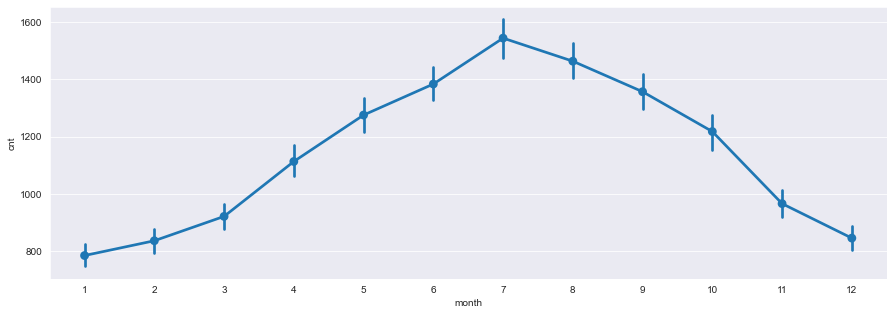

In [39]:
# with pointplot
plt.figure(figsize=(15, 5))
sns.pointplot(x="month", y ="cnt", data=df);

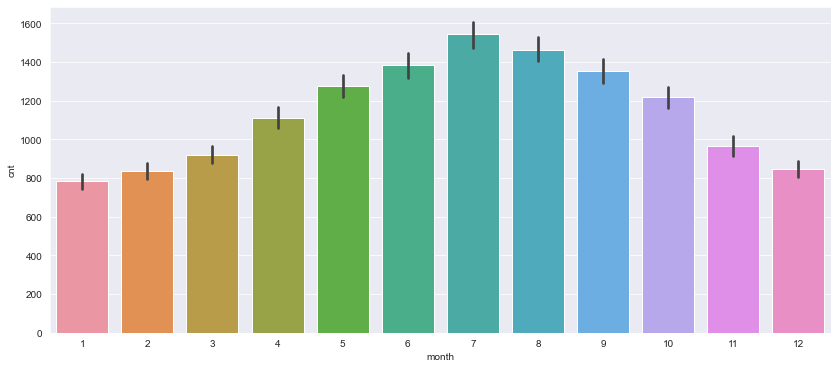

In [42]:
# with barplot
plt.figure(figsize=(14,6))
sns.barplot(data=df, x ='month',y='cnt');
# sns.factorplot(x="month", y="cnt", data=df, kind='bar', size=5, aspect=1.5);

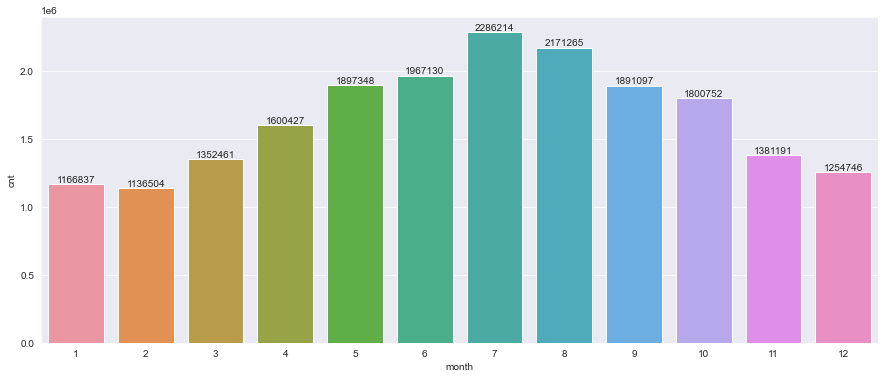

In [44]:
plt.figure(figsize=(15, 6))

chart = sns.barplot(x="month", y="cnt", data=df, estimator=sum, ci=None)
# plt.ticklabel_format(style='plain', axis='y')

# new helper method to auto-label bars (matplotlib 3.4.0+)
chart.bar_label(chart.containers[0], fmt='%d');

### 11.Plot bike shares by hours on (holidays, weekend, season)

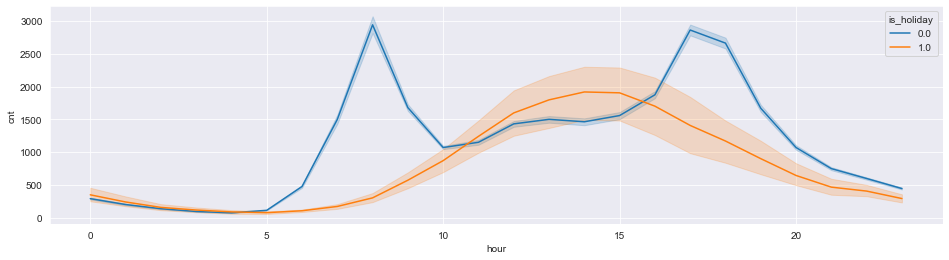

In [45]:
# with lineplot (*whether it is a holiday or not*)
plt.figure(figsize=(16,4))
sns.lineplot(x='hour',y='cnt',hue='is_holiday',data=df);
# pd.DataFrame(df.groupby('hour').cnt.mean().apply(lambda x: round(x, 1))).T

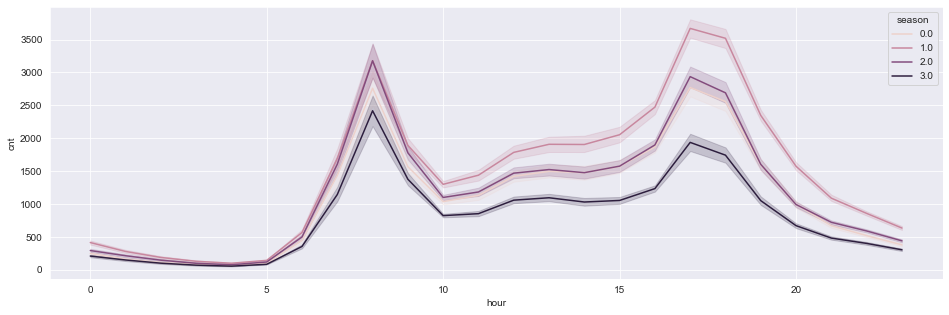

In [46]:
# with lineplot (*You may want to see seasonal breakdowns*)
plt.figure(figsize=(16,5))
sns.lineplot(x='hour',y='cnt',hue='season',data=df);
# pd.DataFrame(df.groupby('hour').cnt.mean().apply(lambda x: round(x, 1))).T

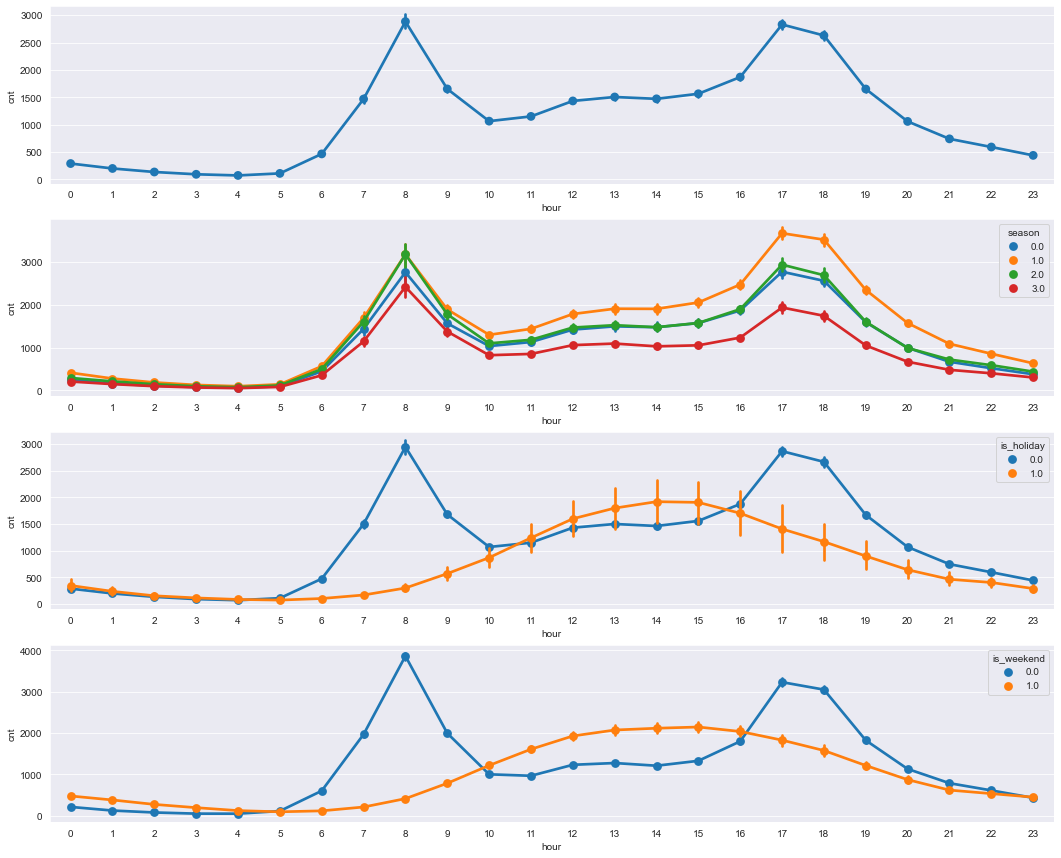

In [51]:
# with pointplot
fig,(ax1,ax2,ax3,ax4)=plt.subplots(nrows =4, figsize=(18,15))
sns.pointplot(data=df, x='hour', y= 'cnt', ax=ax1)
sns.pointplot(data=df, x='hour', y= 'cnt',hue='season', ax=ax2)
sns.pointplot(data=df, x='hour', y= 'cnt',hue='is_holiday', ax=ax3)
sns.pointplot(data=df, x='hour', y= 'cnt',hue='is_weekend' ,ax=ax4);


### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

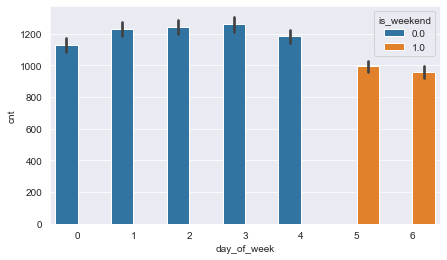

In [52]:
# with barplot
plt.figure(figsize=(7,4))
sns.barplot(x='day_of_week',y='cnt',data=df,hue='is_weekend' );
# # if you want to change legend location
# plt.legend(loc='center left',bbox_to_anchor=(1, 0.928));

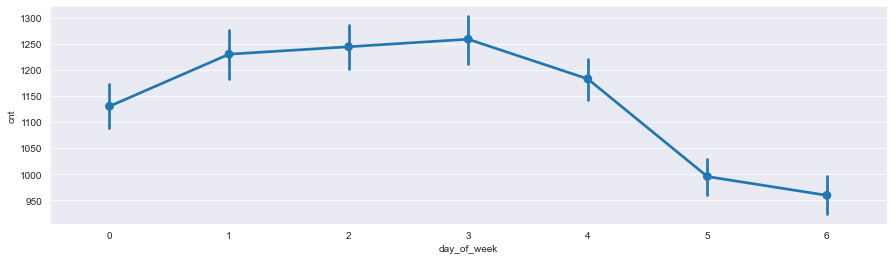

In [53]:
plt.figure(figsize=(15,4))
sns.pointplot(x='day_of_week',y='cnt',data=df);


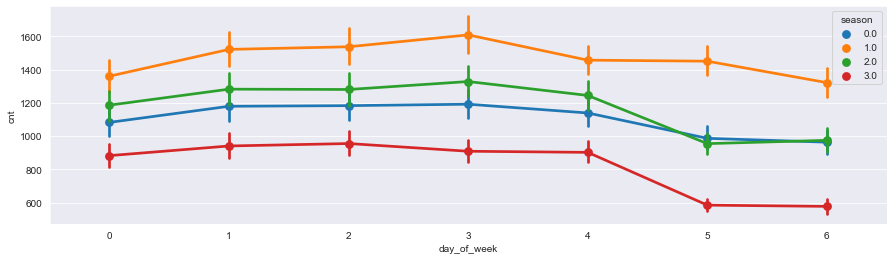

In [54]:
# with pointplot
plt.figure(figsize=(15,4))
sns.pointplot(x='day_of_week',y='cnt',data=df , hue='season');

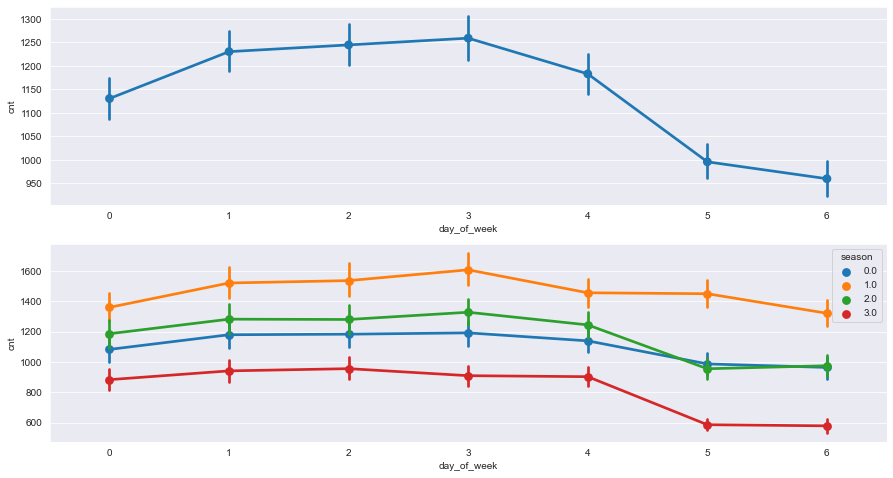

In [55]:
# with pointplot

fig, (ax1, ax2) = plt.subplots(nrows=2) # figzise=(15, 8)
fig.set_size_inches(15, 8)  

sns.pointplot(data=df, x='day_of_week', y='cnt',ax=ax1)
sns.pointplot(x="day_of_week", y="cnt", data=df, hue="season", ax=ax2)
plt.show()

### 13.Plot bike shares by day of month

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,...,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


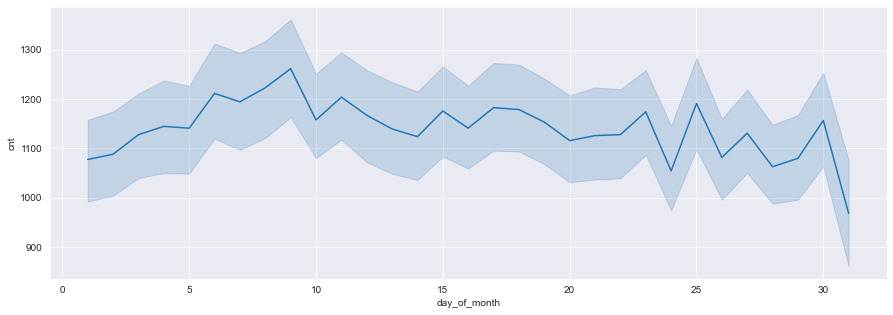

In [57]:
#with lineplot

plt.figure(figsize=(15,5))
sns.lineplot(x='day_of_month',y='cnt',data=df)
pd.DataFrame(df.groupby('day_of_month').cnt.mean().apply(lambda x: round(x))).T
# pd.DataFrame(df.groupby("day_of_month").cnt.mean().astype("int")).T

### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

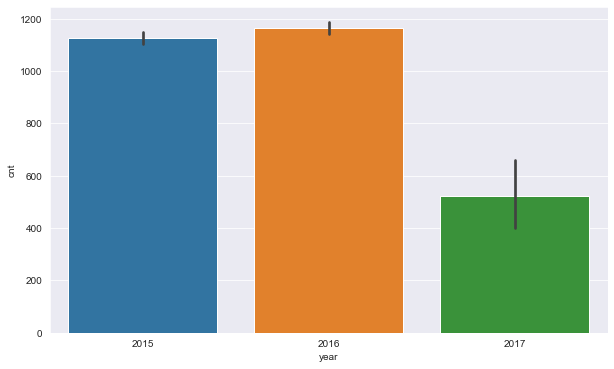

In [58]:
# with barplot
plt.figure(figsize=(10,6))
sns.barplot(x='year',y='cnt',data=df );
# or
# sns.factorplot(x="year", y="cnt", data=df, kind='bar', size=5, aspect=1.5);

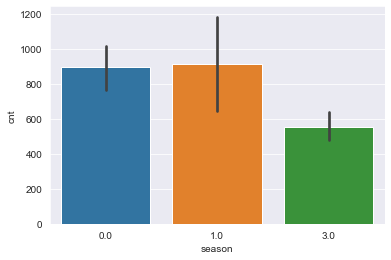

In [60]:
# with barplot
sns.barplot(x='season',y='cnt',data=df[df["is_holiday"]==1]);

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [61]:
df.head(1)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0


In [62]:
df.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

In [63]:
df.is_weekend.value_counts().index

Float64Index([0.0, 1.0], dtype='float64')

In [64]:
df.is_weekend.value_counts().values

array([12444,  4970])

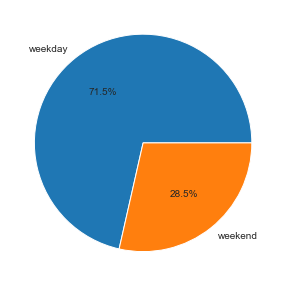

In [65]:
# pie chart
plt.figure(figsize=(8,5))
mylabels=['weekday','weekend']
x=df.is_weekend.value_counts().values
plt.pie(x, labels=mylabels, labeldistance=1.1, autopct="%.1f%%")
plt.show()

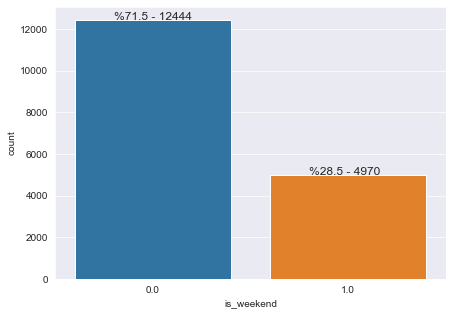

In [68]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='is_weekend' ,data=df);
for bar in ax.patches:
        ax.annotate("%" + str(round(100*bar.get_height()/len(df), 1)) + ' - ' + str(bar.get_height() ),
                    (bar.get_x()+0.2 , bar.get_height()+10),
                    size=12)


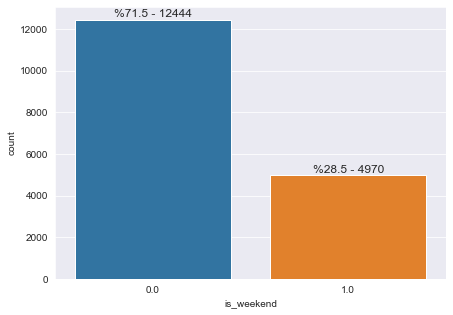

In [69]:
#alternatif solition
fig, ax = plt.subplots(figsize=(7, 5))

ax = sns.countplot(x='is_weekend', data=df)

for bar in ax.patches: 
        ax.annotate( "%" + str(round(100*bar.get_height()/len(df),1)) + ' - ' + str(bar.get_height()), 
                    (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()),  
                    ha='center', 
                    va='center',
                    size=12, 
                    xytext=(0, 6), 
                    textcoords='offset points')


### 16.Plot the distribution of weather code by seasons

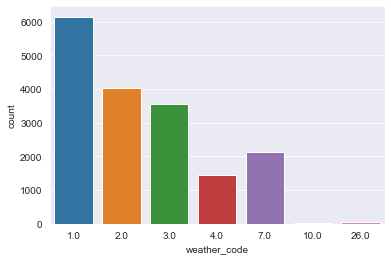

In [70]:
# with countplot
sns.countplot(x='weather_code',data=df);

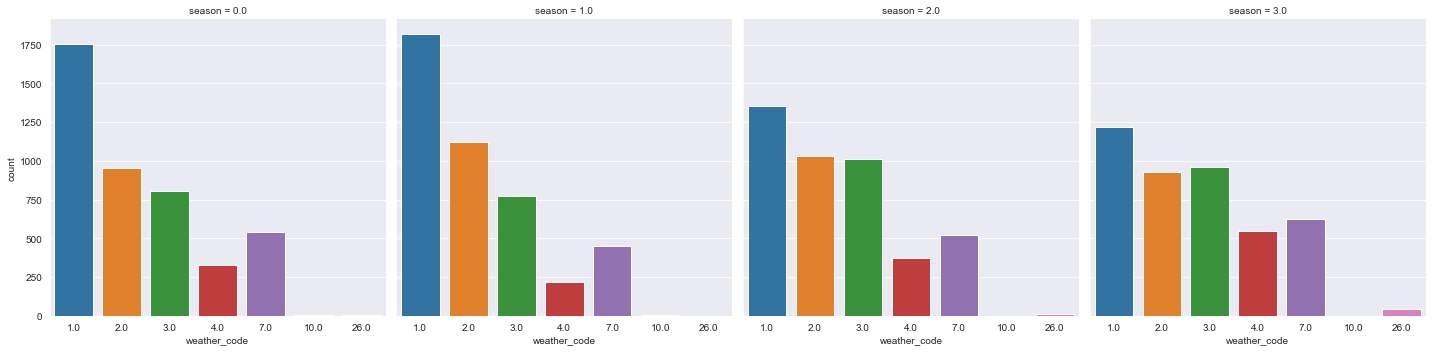

In [71]:
# with catplot
sns.catplot(x='weather_code',data=df,kind='count',col='season');
#burda col yerine hue da kullanirsak tek bir cerceveded bize yine hepsini beraber gosteirir.

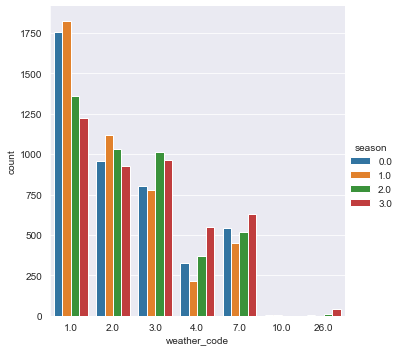

In [72]:
sns.catplot(x="weather_code", hue="season", data=df, kind='count');

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___